In [1]:
from ORBIT.phases.design import ElectricalDesign
from ORBIT import ParametricManager, ProjectManager
import numpy as np
import matplotlib.pyplot as plt

In [2]:
base_config = {
    'export_cable_install_vessel': 'example_cable_lay_vessel',
    'site': {
        'distance': 100, 
        'depth': 20, 
#         'distance_to_landfall': 50
    },
    'plant': {
         'num_turbines': 60, 
#          'capacity': 600
    },
    'turbine': {'turbine_rating': 10},
    'oss_install_vessel': 'example_heavy_lift_vessel',
    'feeder': 'future_feeder',
#     'export_system_design': {
#         'cables': 'XLPE_500mm_220kV',
    
}

In [3]:
parameters = {
    'export_system_design.cables': ['XLPE_1000m_220kV', 'XLPE_1200m_300kV_DC'],
    'site.distance_to_landfall': np.arange(30,330,30),
#     'plant.num_turbines': np.arange(50,250,50), 
    'plant.capacity': np.arange(100,2300,300)
}

In [4]:
results = {
    'cable_cost': lambda run: run.total_cable_cost,
    'oss_cost': lambda run: run.substation_cost,
    'compensation': lambda run: run.cable.compensation_factor
}

In [5]:
parametric = ParametricManager(base_config, parameters, results, module=ElectricalDesign, product=True)
parametric.run()
parametric.results
# parametric.set_option("display.max_rows", None, "display.max_columns", None)
# parametric.preview()

ORBIT library intialized at 'C:\Users\sbredenk\ORBIT\library'
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC cable
Design uses HVDC c

,export_system_design.cables,site.distance_to_landfall,plant.capacity,cable_cost,oss_cost,compensation
0,XLPE_1000m_220kV,30,100,28067000.0,3.325204e+07,3.174298
1,XLPE_1000m_220kV,30,400,56134000.0,6.481958e+07,3.174298
2,XLPE_1000m_220kV,30,700,84201000.0,9.638712e+07,3.174298
3,XLPE_1000m_220kV,30,1000,112268000.0,7.151858e+07,3.174298
4,XLPE_1000m_220kV,30,1300,140335000.0,8.702323e+07,3.174298
...,...,...,...,...,...,...
155,XLPE_1200m_300kV_DC,300,1000,451499800.0,1.863550e+08,NaN
156,XLPE_1200m_300kV_DC,300,1300,451499800.0,1.958453e+08,NaN
157,XLPE_1200m_300kV_DC,300,1600,451499800.0,2.053356e+08,NaN
158,XLPE_1200m_300kV_DC,300,1900,677249700.0,1.947288e+08,NaN


In [6]:
# plt.plot(parametric.results.cable_cost)
# plt.show()
# index = results.index

80


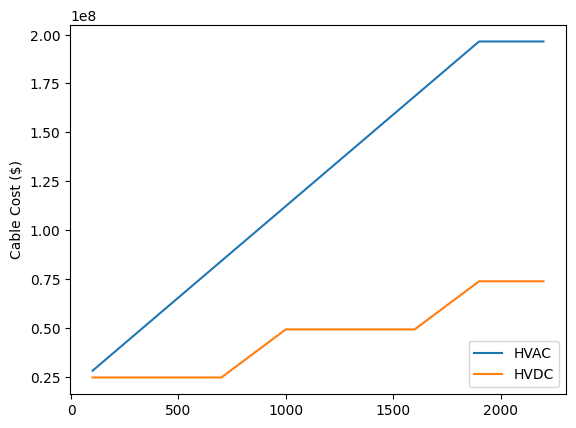

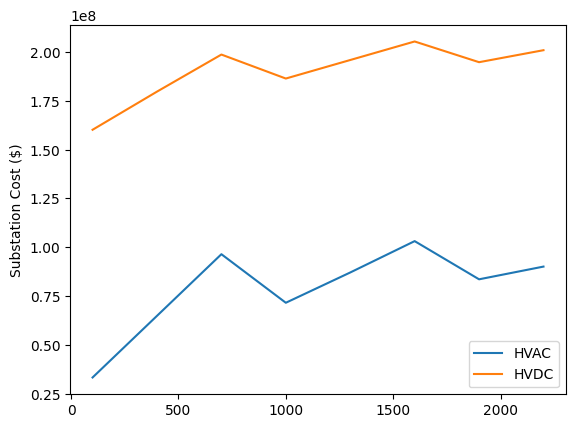

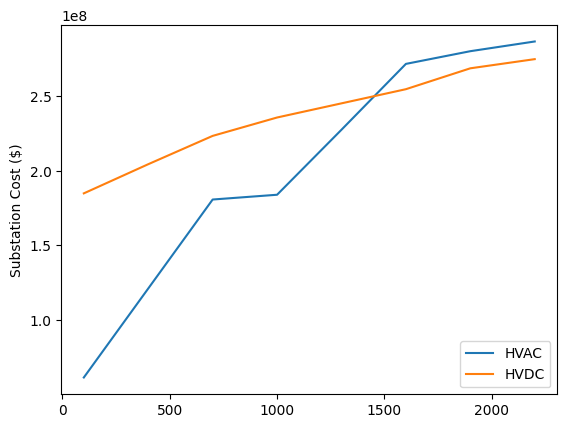

In [7]:
# number per line = total / 4
# 0 - (num-1), num - (2num-1), etc 
# 
num = int(len(parametric.results) / 2)
print(num)

# Cable Cost
plt.plot(np.arange(100,2300,300), parametric.results.cable_cost[0:8])
plt.plot(np.arange(100,2300,300), parametric.results.cable_cost[num:num+8])

plt.legend(["HVAC","HVDC"], loc = "lower right")
plt.ylabel("Cable Cost ($)")
plt.show()

# Substation Cost
plt.plot(np.arange(100,2300,300), parametric.results.oss_cost[0:8])
plt.plot(np.arange(100,2300,300), parametric.results.oss_cost[num:num+8])

plt.legend(["HVAC","HVDC"], loc = "lower right")
plt.ylabel("Substation Cost ($)")
plt.show()

#Total Export System Cost
total_cost = parametric.results.oss_cost + parametric.results.cable_cost
plt.plot(np.arange(100,2300,300), total_cost[0:8])
plt.plot(np.arange(100,2300,300), total_cost[num:num+8])

plt.legend(["HVAC","HVDC"], loc = "lower right")
plt.ylabel("Substation Cost ($)")
plt.show()


10


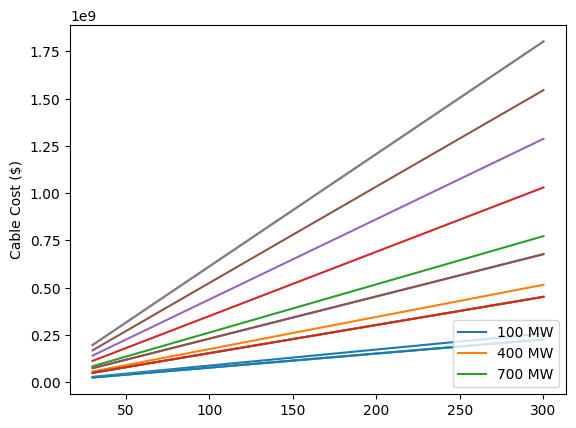

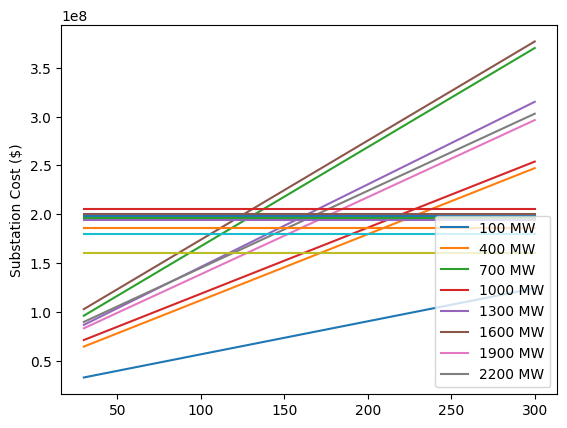

In [23]:
cable_vec = np.zeros((20,8))
oss_vec = np.zeros((20,8))
total_vec = np.zeros((20,8))

for i in np.arange(8):
    for j in np.arange(20):
        index = 8 * j + i 
        cable_vec[j,i] = parametric.results.cable_cost[index]
        oss_vec[j,i] = parametric.results.oss_cost[index]
        total_vec[j,i] = parametric.results.cable_cost[index] + parametric.results.oss_cost[index]

num2 = int(len(cable_vec) / 2)
print(num2)

# Cable Cost
plt.plot(np.arange(30,330,30), cable_vec[0:num2])
plt.plot(np.arange(30,330,30), cable_vec[num2:20])

plt.legend(["100 MW","400 MW","700 MW"], loc = "lower right")
plt.ylabel("Cable Cost ($)")
plt.show()

# Substation Cost
plt.plot(np.arange(30,330,30), oss_vec[0:num2])
plt.plot(np.arange(30,330,30), oss_vec[num2:20])

plt.legend(["100 MW","400 MW","700 MW","1000 MW","1300 MW","1600 MW","1900 MW","2200 MW"], loc = "lower right")
plt.ylabel("Substation Cost ($)")
plt.show()

# # Total Export System Cost
# plt.plot(np.arange(30,330,30), total_vec[0:num2])
# plt.plot(np.arange(30,330,30), total_vec[num2:20])

# plt.legend(["100 MW","400 MW","700 MW"], loc = "lower right")
# plt.ylabel("Export System Cost ($)")
# plt.show()